# Восстановление золота из руды

**Заказчик** - компания «Цифры», разрабатывающая решения для эффективной работы промышленных предприятий.


**Входные данные** - данные с параметрами добычи и очистки, выгруженные из хранилища.


**Задача** - подготовить прототип модели машинного обучения. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Что нужно сделать:

1. Подготовить данные.
2. Провести исследовательский анализ данных.
3. Построить и обучить модель.


**Технологический процесс:**

1) Флотация.

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2) Очистка

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.



![image.jpeg](image.jpeg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li><li><span><a href="#Работа-с-пропущенными-значениями" data-toc-modified-id="Работа-с-пропущенными-значениями-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с пропущенными значениями</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-на-этапах-очистки" data-toc-modified-id="Анализ-концентрации-металлов-на-этапах-очистки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ концентрации металлов на этапах очистки</a></span></li><li><span><a href="#Анализ-размера-гранул-сырья-в-обучающей-и-тестовой-выборках" data-toc-modified-id="Анализ-размера-гранул-сырья-в-обучающей-и-тестовой-выборках-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ размера гранул сырья в обучающей и тестовой выборках</a></span></li><li><span><a href="#Анализ-аномальных-значений" data-toc-modified-id="Анализ-аномальных-значений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ аномальных значений</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-метрики-качества-sMAPE" data-toc-modified-id="Функция-для-вычисления-метрики-качества-sMAPE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция для вычисления метрики качества sMAPE</a></span></li><li><span><a href="#Создание-моделей" data-toc-modified-id="Создание-моделей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Создание моделей</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Обзор данных

Для начала импортируем необходимые в работе библиотеки.

In [1]:
import pandas as pd
import numpy as np
import math 
pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from IPython.display import display

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 

from pprint import pprint

from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import time

Сохраним данные в таблицу.

In [2]:
df_train = pd.read_csv('gold_recovery_train.csv',index_col='date')
df_test = pd.read_csv('gold_recovery_test.csv',index_col='date')
df = pd.read_csv('gold_recovery_full.csv',index_col='date')



Посмотрим общую информацию об исходных данных.

In [3]:
def get_info(data):
    display(data.head())
    display(data.info(memory_usage='deep'))
    
get_info(df)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                             

None

Таблица с исходными данными **df** содержит 22716 строк и 86 столбцов типа `float`. Параметр уровня жидкости во флотационных установках имеет отрицательные значения. Пропущенные значения присутствуют во всех параметрах, за исключением **primary_cleaner.input.feed_size** - размер гранул сырья чернового концентрата перед двухэтапной оочистки. Всего таблица занимает 16.6 МВ памяти.


Посмотрим, как разделены данные на обучающую и тестовую выборки.

In [4]:
for data in [df_train,df_test,df]:
    print(data.shape)

(16860, 86)
(5856, 52)
(22716, 86)


In [5]:
print('Доля тестовой выборки составляет {:.2%}'.format(5856/22716))

Доля тестовой выборки составляет 25.78%


Посмотрим на данные в обучающей и тестовой выборках.

In [6]:
get_info(df_train)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

None

Таблица **df_train** содержит 16860 строк и 86 столбцов типа `float`. Пропущенные значения также присутствуют во всех параметрах, кроме **primary_cleaner.input.feed_size**. Всего таблица занимает 12.3 МВ памяти.

Посмотрим на данные тестовой выборки.

In [7]:
get_info(df_test)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

None

Таблица **df_test** содержит 5856 строк и 52 столбцов типа `float`. Пропущенные значения также присутствуют во всех параметрах, кроме **primary_cleaner.input.feed_size**. Всего таблица занимает 2.7 МВ памяти.

Посмотрим, какие параметры отсутствуют в тестовой выборки.

In [8]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Таким образом получаем, что в тестовой выборке отсутствуют результаты каждого этапа, а также расчетные показатели.

Так как на момент начала производственного процесса нам не известны расчетные показатели, то мы не можем их использовать при построение модели.

In [9]:
#удаление расчетных показателей
df_net = df.drop(['rougher.calculation.sulfate_to_au_concentrate',
                      'rougher.calculation.floatbank10_sulfate_to_au_feed',
                      'rougher.calculation.floatbank11_sulfate_to_au_feed',
                      'rougher.calculation.au_pb_ratio'], axis=1)

train = df_train.drop(['rougher.calculation.sulfate_to_au_concentrate',
                      'rougher.calculation.floatbank10_sulfate_to_au_feed',
                      'rougher.calculation.floatbank11_sulfate_to_au_feed',
                      'rougher.calculation.au_pb_ratio'], axis=1)

#проверка
for data in [df_net,train]:
    print(data.shape)

(22716, 82)
(16860, 82)


## Подготовка данных 

Для начала проверим, есть ли в наших данных дубликаты.

In [10]:
def duplicate():
    for data in [df_net,train,df_test]:
        name =[x for x in globals() if globals()[x] is data][0]
        print('Количество дубликатов в таблице',name,':', data.duplicated().sum())
        
    
duplicate()

Количество дубликатов в таблице df_net : 22
Количество дубликатов в таблице data : 16
Количество дубликатов в таблице df_test : 6


In [11]:
df_net[df_net.duplicated()==True]

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-25 18:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-25 19:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Хотя данные не являются дубликатами, так как были получены в разные дни и время, но в них почти все значения являются 0 или NaN, поэтому удалим их из всех трех выборок. Возможно в это время был технологический перерыв в производстве, поэтому данные некорректные, либо же произошла ошибка при выгрузке данных.

In [12]:
df_net = df_net.drop_duplicates().reset_index(drop=True)
train = train.drop_duplicates().reset_index(drop=True)
df_test = df_test.drop_duplicates().reset_index(drop=True)
    
duplicate()

Количество дубликатов в таблице df_net : 0
Количество дубликатов в таблице train : 0
Количество дубликатов в таблице df_test : 0


Данные удалены. 

### Проверка расчета эффективности обогащения

Проверим, правильно ли рассчитана эффективность обогащения(recovery) после флотации: **rougher.output.recovery**. Параметры, необходимые для рассчета recovery у нас уже есть:
- доля золота в сырье/концентрате до флотации: `train['rougher.input.feed_au']`
- доля золота в концентрате после флотации: `train['rougher.output.concentrate_au']`
- доля золота в отвальных хвостах после флотации/очистки: `train['rougher.output.tail_au']`.


Напишем функцию для расчета recovery.

In [13]:
#функция для расчета recovery
def recovery(share_au_before, share_au_after, share_au_tail):
    '''Возвращает значение recovery - эффективность обогащения руды'''
    recovery = ((share_au_after*(share_au_before-share_au_tail)) / 
                (share_au_before*(share_au_after-share_au_tail)) * 100)
    return recovery


#расчет recovery после этапа флотации
train['rougher.recovery'] = recovery(train['rougher.input.feed_au'],
                                    train['rougher.output.concentrate_au'],
                                    train['rougher.output.tail_au'])


train[['rougher.output.recovery','rougher.recovery']].head()


,rougher.output.recovery,rougher.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


По первым 5 столбцам эффективность обогащения одинаковая. Посмотрим на среднее абсолютное отклонение исходного парметра и рассчитанного только по полным данным.

In [14]:
print('Среднее абсолютное отклонение расчетного значения recovery от фактического: {:.15f}'.format(
      mean_absolute_error(train.loc[~train['rougher.output.recovery'].isna(),'rougher.output.recovery'],
                    train.loc[~train['rougher.output.recovery'].isna(),'rougher.recovery'])))

Среднее абсолютное отклонение расчетного значения recovery от фактического: 0.000000000000009


Эффективность обогащения после этапа флотации рассчитана корректно, различий между расчетными и фактическими значениями отсутствуют.

Также проверим, правильно ли рассчитана финальная эффективность обогащения(recovery) после флотации и двухэтапной очистки: **final.output.recovery**. Параметры, необходимые для рассчета recovery у нас уже есть:
- доля золота в сырье/концентрате до флотации: `train['rougher.input.feed_au']`
- доля золота в концентрате после флотации: `train['rougher.output.concentrate_au']`
- доля золота в отвальных хвостах после флотации/очистки: `train['rougher.output.tail_au']`

In [15]:
train['final.recovery'] = recovery(train['rougher.input.feed_au'],
                                   train['final.output.concentrate_au'],
                                   train['final.output.tail_au'])


display(train[['final.output.recovery','final.recovery']].head())


print('Среднее абсолютное отклонение расчетного значения recovery от фактического: {:.15f}'.format(
      mean_absolute_error(train.loc[~train['final.output.recovery'].isna(),'final.output.recovery'],
                    train.loc[~train['final.output.recovery'].isna(),'final.recovery'])))

,final.output.recovery,final.recovery
0,70.541216,70.541216
1,69.266198,69.266198
2,68.116445,68.116445
3,68.347543,68.347543
4,66.927016,66.927016


Среднее абсолютное отклонение расчетного значения recovery от фактического: 0.000000000000008


Конечная эффективность обогащения руды также рассчитана корректно.

### Работа с пропущенными значениями

Посмотрим на долю пропусков в исходной таблице **df_net**.

In [16]:
df_net.isna().mean().sort_values(ascending=False)

rougher.output.recovery                       0.136468
rougher.output.tail_ag                        0.119635
rougher.output.tail_sol                       0.119591
rougher.output.tail_au                        0.119591
rougher.input.floatbank11_xanthate            0.098484
secondary_cleaner.output.tail_sol             0.096633
final.output.recovery                         0.085529
primary_cleaner.input.sulfate                 0.069930
primary_cleaner.input.depressant              0.067154
rougher.input.floatbank10_sulfate             0.056359
primary_cleaner.input.xanthate                0.049749
primary_cleaner.output.concentrate_sol        0.034194
rougher.input.floatbank11_sulfate             0.028906
rougher.state.floatbank10_e_air               0.026351
rougher.input.feed_rate                       0.023398
rougher.input.floatbank10_xanthate            0.019697
primary_cleaner.output.concentrate_pb         0.018771
rougher.input.feed_size                       0.018375
final.outp

Для большинства параметров доля пропусков очень низкая - меньше 1%. Доля пропусков выше 10% для параметров:
- rougher.output.recovery
- rougher.output.tail_ag
- rougher.output.tail_sol
- rougher.output.tail_au   

Так как доля пропусков в большинстве параметров незначительная, а также имеет место технологический процесс, в котором соседние по времени параметры часто похоже, то все пропуски заменим на соседние значения.

Для параметров с долей пропусков больше 10% построим распределения и проверим, не исказили ли мы данные выбранным методом.

Количество пропусков в параметре rougher.output.recovery: 3097
Среднее значение параметра rougher.output.recovery до замены на соседние значения: 86.14
Среднее значение параметра rougher.output.recovery после замены на соседние значения: 85.83


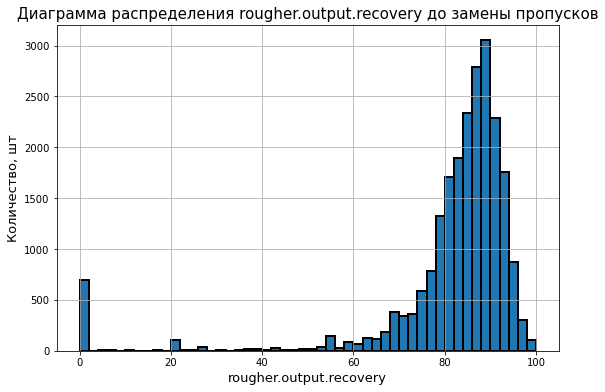

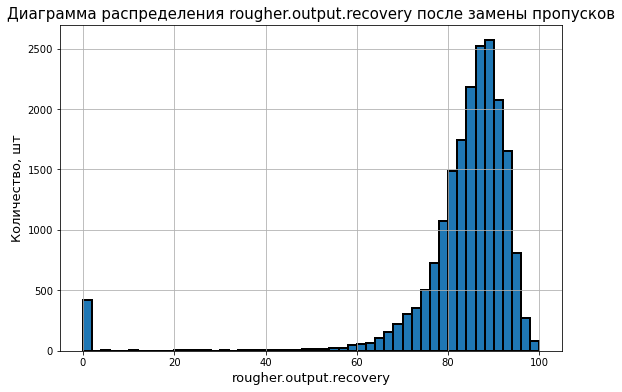

In [17]:
def ffill(parameter):
    '''Заменяет пропуски на соседние значения в заданном параметре, выводит распределения до и после заполнения'''
    
    check = df_net[parameter].copy()

    check = check.fillna(method='ffill')
    print('Количество пропусков в параметре '+parameter+':',df_net[parameter].isna().sum()) 
    print('Среднее значение параметра '+parameter+' до замены на соседние значения: {:.2f}'.format(df_net[parameter].median()))
    print('Среднее значение параметра '+parameter+' после замены на соседние значения: {:.2f}'.format(check.median()))
 

    check.hist(bins=50, figsize=(9,6), edgecolor='black', linewidth=2)
    #задает форматирование
    plt.title('Диаграмма распределения '+parameter+' до замены пропусков', fontsize=15)
    plt.xlabel(parameter, fontsize=13)
    plt.ylabel('Количество, шт', fontsize=13)
    plt.show()
    
    df_net[parameter].hist(bins=50, figsize=(9,6), edgecolor='black', linewidth=2)
    #задает форматирование
    plt.title('Диаграмма распределения '+parameter+' после замены пропусков', fontsize=15)
    plt.xlabel(parameter, fontsize=13)
    plt.ylabel('Количество, шт', fontsize=13)
    plt.show()
    
    
ffill('rougher.output.recovery')  

Распределение эффективности обогащения руды после флотации при замене на соседние значения изменилось, но незначительно, среднее значение снизилось с 86.14 до 85.83.
Проверим также остальные параметры. 

Количество пропусков в параметре rougher.output.tail_ag: 2715
Среднее значение параметра rougher.output.tail_ag до замены на соседние значения: 5.76
Среднее значение параметра rougher.output.tail_ag после замены на соседние значения: 5.74


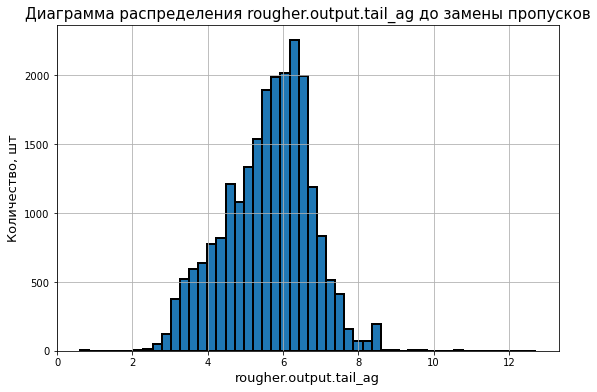

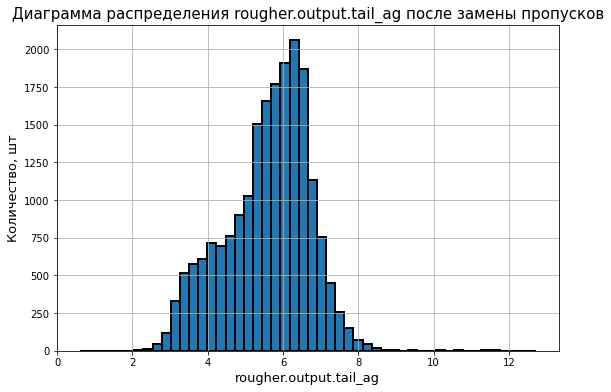

In [18]:
ffill('rougher.output.tail_ag')  

Количество пропусков в параметре rougher.output.tail_sol: 2714
Среднее значение параметра rougher.output.tail_sol до замены на соседние значения: 18.08
Среднее значение параметра rougher.output.tail_sol после замены на соседние значения: 17.84


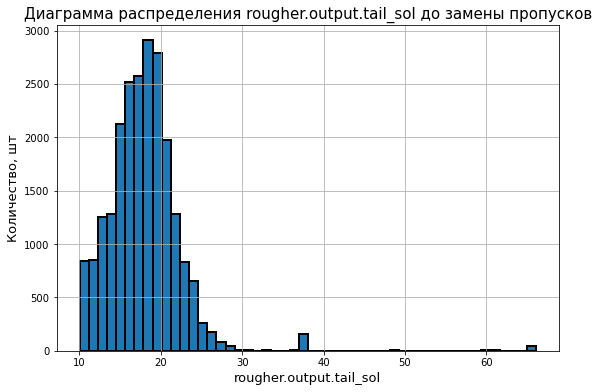

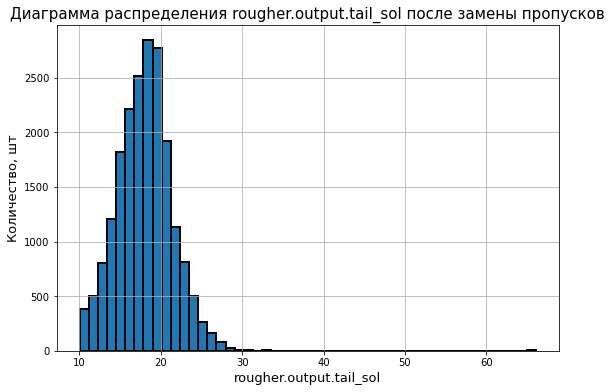

In [19]:
ffill('rougher.output.tail_sol') 

Количество пропусков в параметре rougher.output.tail_au: 2714
Среднее значение параметра rougher.output.tail_au до замены на соседние значения: 1.81
Среднее значение параметра rougher.output.tail_au после замены на соседние значения: 1.83


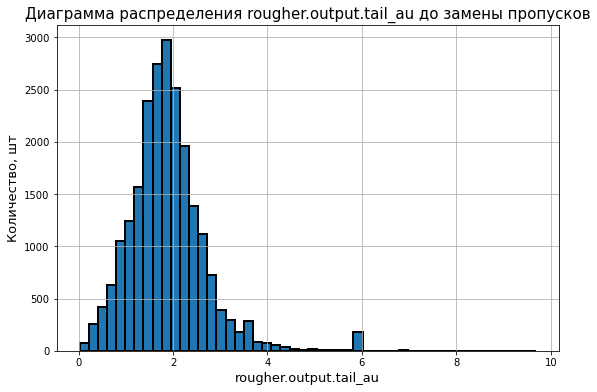

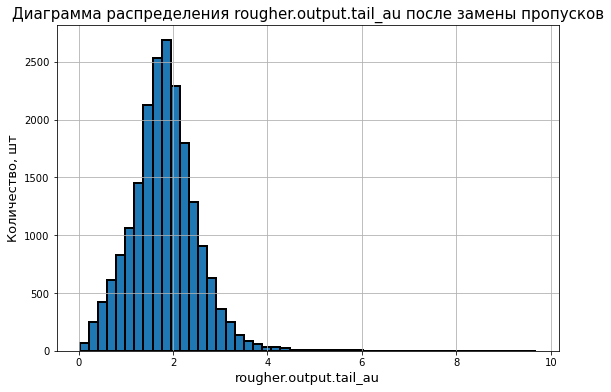

In [20]:
ffill('rougher.output.tail_au') 

Замена пропусков соседними значениями не сильно, но все же изменяет распределение данных. Чтобы не исказить данные и модель, удалим все пропуски по целевым параметрам, а по остальным - заполним на соседние значения.

In [21]:
columns_au = data.loc[:,data.columns.str.contains('recovery')].columns
columns_au

Index(['final.output.recovery', 'rougher.output.recovery'], dtype='object')

In [22]:
def dropna_data(data):
    '''Удаляет строки с пропусками в параметрах, относящихся к золоту'''
    columns_au = data.loc[:,data.columns.str.contains('au')].columns
    columns_recovery = data.loc[:,data.columns.str.contains('recovery')].columns
    
    print('До удаления:')
    print('Количество строк:',len(data))
    print('')
    print(data.loc[:, columns_au].isna().sum())
    print('')
    print(data.loc[:, columns_recovery].isna().sum())
    
    
    for column in columns_au:
        data.dropna(subset =[column], inplace=True)
    
    for column in columns_recovery:
        data.dropna(subset =[column], inplace=True)
        

    print('')
    print('-----------------------------------------------------')
    print('После удаления:')
    print('Количество строк:',len(data))
    print('')
    print(data.loc[:, columns_au].isna().sum())
    print('')
    print(data.loc[:, columns_recovery].isna().sum())

Удалим данные в таблице **df_net**.

In [23]:
dropna_data(df_net)

До удаления:
Количество строк: 22694

final.output.concentrate_au                78
final.output.tail_au                       73
primary_cleaner.output.concentrate_au      76
primary_cleaner.output.tail_au             77
rougher.input.feed_au                      77
rougher.output.concentrate_au              76
rougher.output.tail_au                   2714
secondary_cleaner.output.tail_au           76
dtype: int64

final.output.recovery      1941
rougher.output.recovery    3097
dtype: int64

-----------------------------------------------------
После удаления:
Количество строк: 19439

final.output.concentrate_au              0
final.output.tail_au                     0
primary_cleaner.output.concentrate_au    0
primary_cleaner.output.tail_au           0
rougher.input.feed_au                    0
rougher.output.concentrate_au            0
rougher.output.tail_au                   0
secondary_cleaner.output.tail_au         0
dtype: int64

final.output.recovery      0
rougher.output.recov

Тоже самое сделаем и для таблиц **train и df_test**.

In [24]:
dropna_data(train)

До удаления:
Количество строк: 16844

final.output.concentrate_au                69
final.output.tail_au                       64
primary_cleaner.output.concentrate_au      66
primary_cleaner.output.tail_au             67
rougher.input.feed_au                      67
rougher.output.concentrate_au              66
rougher.output.tail_au                   2233
secondary_cleaner.output.tail_au           66
dtype: int64

final.output.recovery      1505
rougher.output.recovery    2557
rougher.recovery           2267
final.recovery             1262
dtype: int64

-----------------------------------------------------
После удаления:
Количество строк: 14149

final.output.concentrate_au              0
final.output.tail_au                     0
primary_cleaner.output.concentrate_au    0
primary_cleaner.output.tail_au           0
rougher.input.feed_au                    0
rougher.output.concentrate_au            0
rougher.output.tail_au                   0
secondary_cleaner.output.tail_au         0

In [25]:
dropna_data(df_test)

До удаления:
Количество строк: 5850

rougher.input.feed_au    10
dtype: int64

Series([], dtype: float64)

-----------------------------------------------------
После удаления:
Количество строк: 5840

rougher.input.feed_au    0
dtype: int64

Series([], dtype: float64)


В целевых параметрах все пропуски удалены, теперь заполним остальные соседними значениями.

In [26]:
df_net = df_net.fillna(method='ffill')
train = train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

Проверим, не осталось ли пропусков в данных.

In [27]:
df_net.isna().mean()

final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
final.output.recovery                         0.0
final.output.tail_ag                          0.0
final.output.tail_pb                          0.0
final.output.tail_sol                         0.0
final.output.tail_au                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.output.concentrate_ag         0.0
primary_cleaner.output.concentrate_pb         0.0
primary_cleaner.output.concentrate_sol        0.0
primary_cleaner.output.concentrate_au         0.0
primary_cleaner.output.tail_ag                0.0
primary_cleaner.output.tail_pb                0.0
primary_cleaner.output.tail_sol               0.0


In [28]:
train.isna().mean()

final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
final.output.recovery                         0.0
final.output.tail_ag                          0.0
final.output.tail_pb                          0.0
final.output.tail_sol                         0.0
final.output.tail_au                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.output.concentrate_ag         0.0
primary_cleaner.output.concentrate_pb         0.0
primary_cleaner.output.concentrate_sol        0.0
primary_cleaner.output.concentrate_au         0.0
primary_cleaner.output.tail_ag                0.0
primary_cleaner.output.tail_pb                0.0
primary_cleaner.output.tail_sol               0.0


In [29]:
df_test.isna().mean()

primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0
rougher.input.floatbank10_xanthate            0.0


Все пропуски заполнены. Перейдем к анализу данных.

Промежуточные результаты:
- Показатели эффективности обогащения руды после этапа флотации и финальная рассчитаны корректно.
- Так как в технологическом процессе соседние по времени параметры часто похоже, то все пропущенные данные заменены на соседние значения. Это позволило сохранить все данные и не исказить их.

## Анализ данных

### Анализ концентрации металлов на этапах очистки

Посмотрим, как изменяется средняя концентрация золота, серебра и свинца на каждом этапе технологического процесса.
Для этого напишем функцию, которая выводит распределения на одном графике.

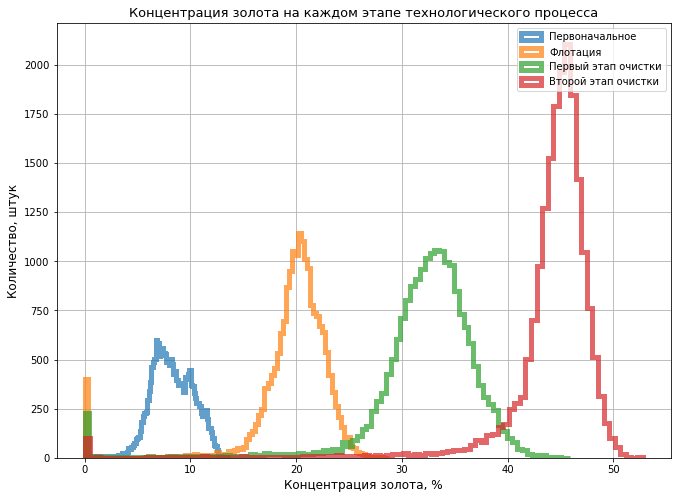

In [30]:
def plot_hist(data, feed,rougher, primary_cleaner, final,metal):
    '''Выводит гистограмму концентрации металла на каждом этапе технологического процесса'''
    ax = data.plot(kind='hist',
                   y=feed,
                   histtype='step',
                   figsize=(11,8),
                   bins=100,
                   linewidth=5,
                   alpha=0.7,
                   label='Первоначальное')

    data.plot(kind='hist',
              y=rougher,
              histtype='step',
              bins=100,
              linewidth=5,
              alpha=0.7,
              label='Флотация',
              ax=ax,
              grid=True,
              legend=True)
    
    
    data.plot(kind='hist',
              y=primary_cleaner,
              histtype='step',
              bins=100,
              linewidth=5,
              alpha=0.7,
              label='Первый этап очистки',
              ax=ax,
              grid=True,
              legend=True)

                   
    data.plot(kind='hist',
              y=final,
              histtype='step',
              bins=100,
              linewidth=5,
              alpha=0.7,
              label='Второй этап очистки',
              ax=ax,
              grid=True,
              legend=True)
    

    plt.title('Концентрация '+metal+' на каждом этапе технологического процесса', fontsize=13)
    plt.ylabel('Количество, штук', fontsize=12)
    plt.xlabel('Концентрация '+metal+', %', fontsize=12)
    plt.show()
    

plot_hist(df_net,
          'rougher.input.feed_au',
          'rougher.output.concentrate_au',
          'primary_cleaner.output.concentrate_au',
          'final.output.concentrate_au',
          'золота')

Видим, что концентрация золота постепенно увеличивается на каждом этапе производственного процесса.  В среднем доля золота выростает с 8% до 45%. 
В данных на каждом этапе присутствует пик в районе 0, возможно это обусловлено перерывом в технологическом процессе. Изучим эту ситуацию позднее.

Добавим в общую таблицу среднюю концентрацию на каждом этапе производственного процесса. В качестве среднеего значения будем использовать медиану, так как в данных присутствует пик в районе 0.

In [31]:
concentrate_metal = pd.DataFrame({"Метал": ["Золото"], 
                                  "Исходное сырье": [df_net['rougher.input.feed_au'].median()], 
                                  "После флотации": [df_net['rougher.output.concentrate_au'].median()],
                                  "После первого этапа очистки": [df_net['primary_cleaner.output.concentrate_au'].median()],
                                  "После второго этапа очистки": [df_net['final.output.concentrate_au'].median()]
                      })

display(concentrate_metal)



,Метал,Исходное сырье,После флотации,После первого этапа очистки,После второго этапа очистки
0,Золото,8.125839,20.280214,32.841295,45.011244


Изучим распределение концентрации серебра на каждом этапе технологического процесса.

,Метал,Исходное сырье,После флотации,После первого этапа очистки,После второго этапа очистки
0,Золото,8.125839,20.280214,32.841295,45.011244
1,Серебро,8.593574,12.098115,8.507298,5.066039


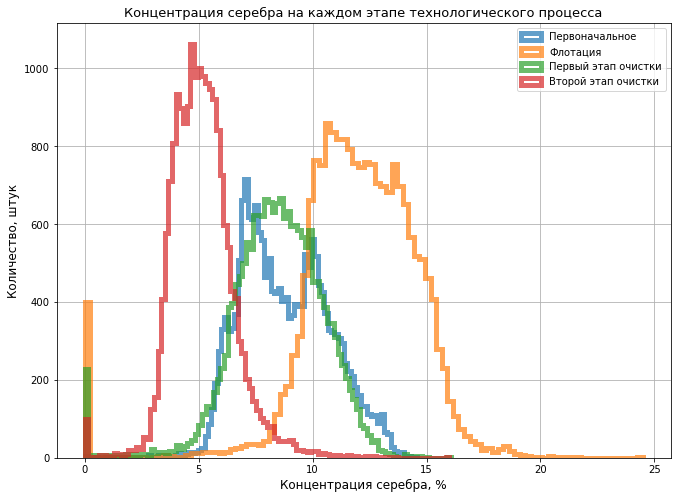

In [32]:
concentrate_metal = concentrate_metal.append({"Метал": "Серебро", 
                                              "Исходное сырье": df_net['rougher.input.feed_ag'].median(), 
                                              "После флотации": df_net['rougher.output.concentrate_ag'].median(),
                                              "После первого этапа очистки": df_net['primary_cleaner.output.concentrate_ag'].median(),
                                              "После второго этапа очистки": df_net['final.output.concentrate_ag'].median()},
                                              ignore_index=True)
display(concentrate_metal)

plot_hist(df_net,
          'rougher.input.feed_ag',
          'rougher.output.concentrate_ag',
          'primary_cleaner.output.concentrate_ag',
          'final.output.concentrate_ag',
          'серебра')


Первоначальная концентрация серебра в руде была в среднем на уровне первоначальной концентрации золота, после этапа флотации доля серебра выросла в среднем до 12%, а в процессе двухэтапной очистки постепенно снижалась в среднем до 5%. 

Посмотрим на изменение концентрации свинца.

,Метал,Исходное сырье,После флотации,После первого этапа очистки,После второго этапа очистки
0,Золото,8.125839,20.280214,32.841295,45.011244
1,Серебро,8.593574,12.098115,8.507298,5.066039
2,Свинец,3.528235,7.742580,10.142270,10.102264


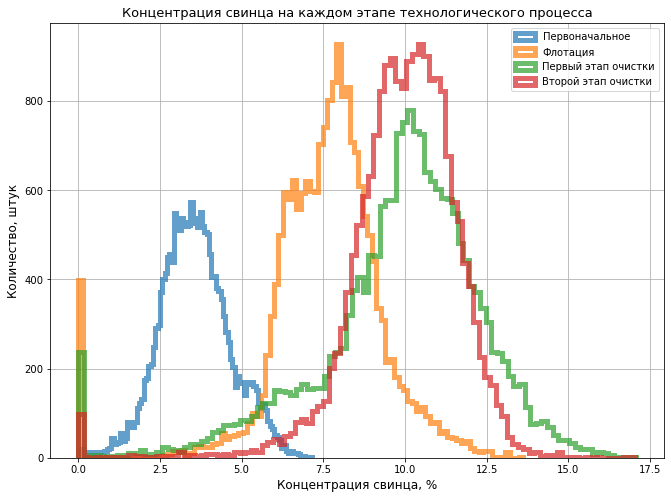

In [33]:
concentrate_metal = concentrate_metal.append({"Метал": "Свинец", 
                                              "Исходное сырье": df_net['rougher.input.feed_pb'].median(), 
                                              "После флотации": df_net['rougher.output.concentrate_pb'].median(),
                                              "После первого этапа очистки": df_net['primary_cleaner.output.concentrate_pb'].median(),
                                              "После второго этапа очистки": df_net['final.output.concentrate_pb'].median()},
                                              ignore_index=True)

display(concentrate_metal)

plot_hist(df_net,
          'rougher.input.feed_pb',
          'rougher.output.concentrate_pb',
          'primary_cleaner.output.concentrate_pb',
          'final.output.concentrate_pb',
          'свинца')


Первоначальная концентрация серебра в руде была в среднем 3%, на каждом этапе технологического процесса доля свинца постепенно росла, конечная концентрация в среднем составляет 10%. 

Промежуточный вывод.

- В процессе технологического производства наблюдается рост доли золота и свинца. Наибольший рост достигает концентрация золота - в среднем с 8 до 45%. Концентрация свинца в среднем растет с 3% до 10%. 

- Несмотря на то, что доля серебра увеличивается после этапа флотации, после двухэтапной очистки ее концентрация снижается ниже первоначальной. Итоговое снижение доли серебра в среднем составляет с 8 до 5%. 

### Анализ размера гранул сырья в обучающей и тестовой выборках

В данных присутствуют два размера гранул сырья:
- **rougher.input.feed_size** - размер гранул исходного сырья,
- **primary_cleaner.input.feed_size** - размер гранул в черновом концентрате. 

Объединим данные в единую таблицу и сравним распределения.

In [34]:
#формирует таблицу с размером гранул исходного сырья и чернового концентрата по обучающей выборке
feed_size_train= train[['rougher.input.feed_size','primary_cleaner.input.feed_size']].copy()
feed_size_train['sample'] = 'train'

#формирует таблицу с размером гранул исходного сырья и чернового концентрата по тестовой выборке
feed_size_test= df_test[['rougher.input.feed_size','primary_cleaner.input.feed_size']].copy()
feed_size_test['sample'] = 'test'

#объединяет в единую таблицу
feed_size =  pd.concat([feed_size_train, feed_size_test])

print('Размер обучающей выборки: {}, размер тестовой выборки: {}, размер конечной таблицы: {}'.format(
    len(feed_size_train),len(feed_size_test),len(feed_size)))
display(feed_size.groupby('sample').count())

Размер обучающей выборки: 14149, размер тестовой выборки: 5840, размер конечной таблицы: 19989


,rougher.input.feed_size,primary_cleaner.input.feed_size
sample,,
test,5840,5840
train,14149,14149


Сравним распределения размера гранул исходного сырья, построив диаграммы размаха.

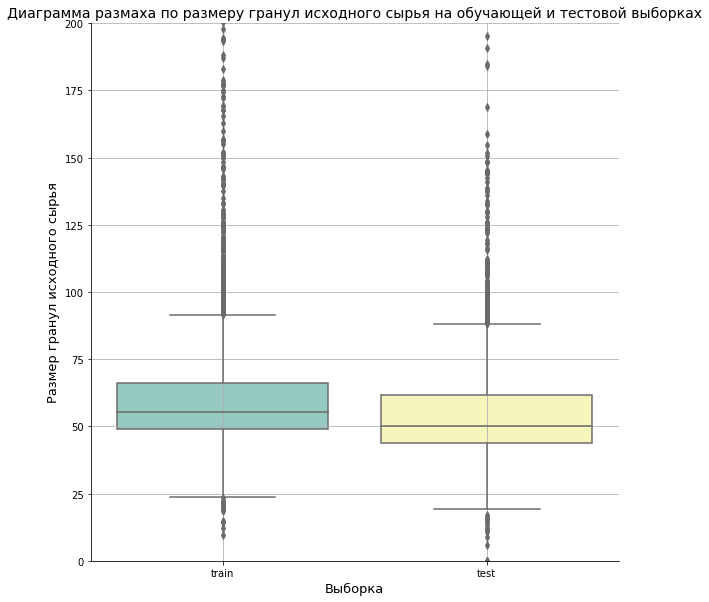

Обучающая выборка:


count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64


Тестовая выборка:


count    5840.000000
mean       55.932522
std        22.729613
min         0.046369
25%        43.883852
50%        49.996477
75%        61.639417
max       477.445473
Name: rougher.input.feed_size, dtype: float64

In [35]:
def catplot_feed_size(parameter, title,ylim_min,ylim_max):
    '''Выводит диаграмму размаха размера сырья в обучающей и тестовой выборках, а также распределение'''
    #выводит диаграмму размаха
    sns.catplot(x='sample', y=parameter, kind="box", data=feed_size, orient='v',
                palette="Set3", height=8)

    #задает форматирование
    plt.title('Диаграмма размаха по размеру гранул '+title+' на обучающей и тестовой выборках', fontsize=14)
    plt.ylim(ylim_min,ylim_max)
    plt.xlabel('Выборка', fontsize=13)
    plt.ylabel('Размер гранул '+title, fontsize=13)
    plt.grid(True)
    plt.show()
    
    #выводит информацию о распределении
    print('Обучающая выборка:')
    display(feed_size_train[parameter].describe().to_frame())
    print('')
    print('Тестовая выборка:')
    display(feed_size_test[parameter].describe().to_frame())
    
catplot_feed_size('rougher.input.feed_size', 'исходного сырья', 0,200)

Из диаграммы размаха можем сказать, что оба распределения размера гранул положительно ассиметричные. Обе выборки имеют примерно одинаковый охват. Как в обучающей, так и в тестовой выборках есть значения, лежащие за границами "усов".

Средние значения и медианы близки. Среднее значение размера гранул исходного сырья в обучающей выборке составляет 60 у.е., а в тестовой - 56 у.е., медианы равны 55 и 50 у.е. соответственно.

Посмотрим на распределение размера гранул чернового концентрата.

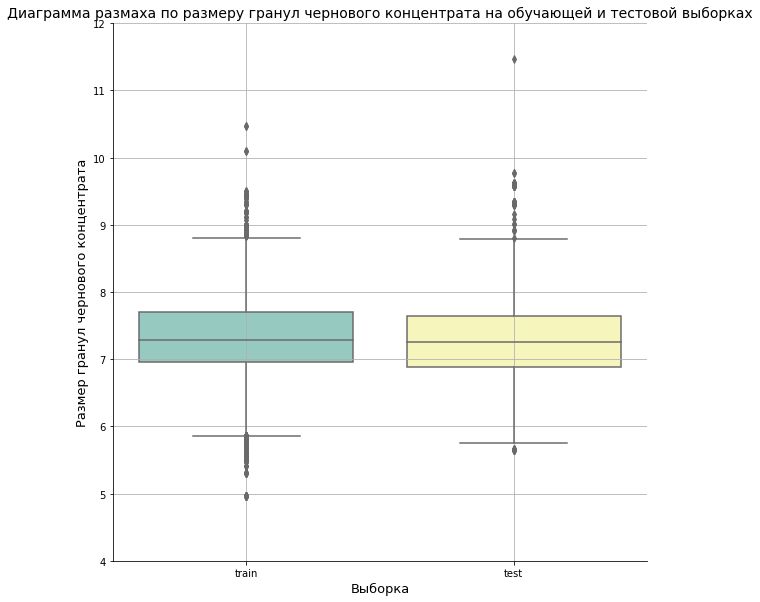

Обучающая выборка:


count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64


Тестовая выборка:


count    5840.000000
mean        7.264358
std         0.612185
min         5.650000
25%         6.880000
50%         7.250000
75%         7.650000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

In [36]:
catplot_feed_size('primary_cleaner.input.feed_size', 'чернового концентрата',4,12)

Из диаграммы размаха можем сказать, что оба распределения размера гранул нормальные. Обе выборки также имеют примерно одинаковый охват. Как в обучающей, так и в тестовой выборках есть значения, лежащие за границами "усов".

Разброс значений стал гораздо уже (0-15.5 у.е.), чем в исходном сырье (0-484 у.е.). 

Средние значения и медианы близки. Среднее значение размера гранул исходного сырья в обучающей выборке составляет 7.32 у.е., а в тестовой - 7.26 у.е., медианы равны 7.29 и 7.25 у.е. соответственно.

Посмотрим на итоговую таблицу.

In [37]:
result_feed_size = pd.DataFrame({"Выбока/Сырье": ["Обучающая выборка,исходное сырье",
                                                  "Тестовая выборка, исходное сырье",
                                                  "Обучающая выборка, черновой концентрат",
                                                  "Тестовая выборка, черновой концентрат"], 
                                  "Среднее значение": [feed_size_train['rougher.input.feed_size'].mean(),
                                                       feed_size_test['rougher.input.feed_size'].mean(),
                                                       feed_size_train['primary_cleaner.input.feed_size'].mean(),
                                                       feed_size_test['primary_cleaner.input.feed_size'].mean()], 
                                  "Медиана": [feed_size_train['rougher.input.feed_size'].median(),
                                              feed_size_test['rougher.input.feed_size'].median(),
                                              feed_size_train['primary_cleaner.input.feed_size'].median(),
                                              feed_size_test['primary_cleaner.input.feed_size'].median()],
                                
                      })
result_feed_size

,Выбока/Сырье,Среднее значение,Медиана
0,"Обучающая выборка,исходное сырье",60.239856,55.269784
1,"Тестовая выборка, исходное сырье",55.932522,49.996477
2,"Обучающая выборка, черновой концентрат",7.322310,7.290000
3,"Тестовая выборка, черновой концентрат",7.264358,7.250000


Несмотря на то, что средние значения и медианы размера гранул исходного сырья имеют различия, в черновом концентрате они становятся почти идентичными. Таким образом, считаем, что разделение на обучающую и тестовую выборки корректное.

Промежуточный результат.

- **В исходном сырье** средний размер гранул и их медианы незначительно различается в обучающей и тестовой выборках:
    - средний размер гранул в обучающей выборки - 60 у.е., в тестовой - 56 у.е.
    - медиана в обучающей выборки - 55 у.е., в тестовой - 50 у.е

Обе выборки имеют примерно одинаковый охват. Как в обучающей, так и в тестовой выборках есть значения, лежащие за границами "усов".

- **В черновом концентрате** средний размер гранул и их медианы почти аналогичны:
    - средний размер гранул в обучающей выборки - 7.32 у.е., в тестовой - 7.26 у.е.
    - медиана в обучающей выборки - 7.29 у.е., в тестовой - 7.25 у.е

Разброс значений размера гранул в черновом концентрате стал гораздо уже (0-15.5 у.е.), чем в исходном сырье (0-484 у.е.). 


### Анализ аномальных значений

Исследуем суммарную концентрацию всех веществ на разных стадиях технологического процесса по данным в исходной таблице.

In [38]:
def add_sum_concentrate(data):
    #суммарная концентрация всех элементов в исходном сырье
    data['rougher.input.concentrate_ag_au_pb_sol'] = (data['rougher.input.feed_ag'] +
                                                      data['rougher.input.feed_pb'] +
                                                      data['rougher.input.feed_sol'] +
                                                      data['rougher.input.feed_au'])

    #суммарная концентрация всех элементов в черновом концентрате
    data['rougher.output.concentrate_ag_au_pb_sol'] = (data['rougher.output.concentrate_ag'] +
                                                       data['rougher.output.concentrate_pb'] +
                                                       data['rougher.output.concentrate_sol'] +
                                                       data['rougher.output.concentrate_au'])

    #суммарная концентрация всех элементов после первого этапа очистки
    data['primary_cleaner.output.concentrate_ag_au_pb_sol'] = (data['primary_cleaner.output.concentrate_ag'] +
                                                               data['primary_cleaner.output.concentrate_pb'] +
                                                               data['primary_cleaner.output.concentrate_sol'] +
                                                               data['primary_cleaner.output.concentrate_au'])

    #суммарная концентрация всех элементов в финальном концентрате
    data['final.output.concentrate_ag_au_pb_sol'] = (data['final.output.concentrate_ag'] +
                                                     data['final.output.concentrate_pb'] +
                                                     data['final.output.concentrate_sol'] +
                                                     data['final.output.concentrate_au'])

add_sum_concentrate(df_net)

Посмотрим на распределение суммарной концентрации на каждом этапе.

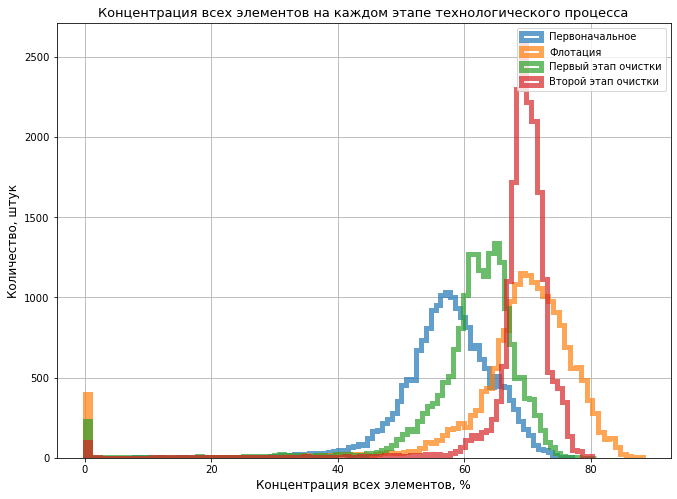

In [39]:
plot_hist(df_net,
          'rougher.input.concentrate_ag_au_pb_sol',
          'rougher.output.concentrate_ag_au_pb_sol',
          'primary_cleaner.output.concentrate_ag_au_pb_sol',
          'final.output.concentrate_ag_au_pb_sol',
          'всех элементов')

На каждом этапе присутствует нулевая суммарная концентрация элементов. Как ранее предполагали, скорее всего это связано с технологическим перерывом в процессе производства или же сбоем измерительного оборудования. Данные аномалии удалим из данных, так как они только исказят модель. Из графика распределения видим, что суммарная концентрация ниже 5% крайне редко встречается на всех этапах технологического процесса, возьмем данное значение в качестве порога для удаления аномалий. Так как пропущенные значения заменили на соседние, то уберем значения ниже пороговых по всем показателям суммарной концентрации.

Для начала добавим суммарные показатели в таблицы  **train и df_test**, в тестовую выборку также добавим целевые признаки: `rougher.output.recovery` и `final.output.recovery`.


In [40]:
add_sum_concentrate(train)

train.head()


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.recovery,final.recovery,rougher.input.concentrate_ag_au_pb_sol,rougher.output.concentrate_ag_au_pb_sol,primary_cleaner.output.concentrate_ag_au_pb_sol,final.output.concentrate_ag_au_pb_sol
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216,51.680034,66.424950,72.640924,63.644396
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.3691

Также добавим в тестовую выборку.

In [41]:
test = df_test.merge(df_net[['rougher.output.recovery','final.output.recovery',
                                'rougher.input.concentrate_ag_au_pb_sol','rougher.output.concentrate_ag_au_pb_sol',
                                'primary_cleaner.output.concentrate_ag_au_pb_sol','final.output.concentrate_ag_au_pb_sol']],
                        left_index = True,
                        right_index = True,
                        how='left')

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 5849
Data columns (total 58 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   primary_cleaner.input.sulfate                    5840 non-null   float64
 1   primary_cleaner.input.depressant                 5840 non-null   float64
 2   primary_cleaner.input.feed_size                  5840 non-null   float64
 3   primary_cleaner.input.xanthate                   5840 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air           5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level         5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air           5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level         5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air           5840 non-null   float64
 9   primary_cleaner.state.floatban

Данные добавили, пропущенных значений нет. Удалим все аномалии.

Количество строк до удаления аномалий: 19439
Количество строк после удаления аномалий: 18701


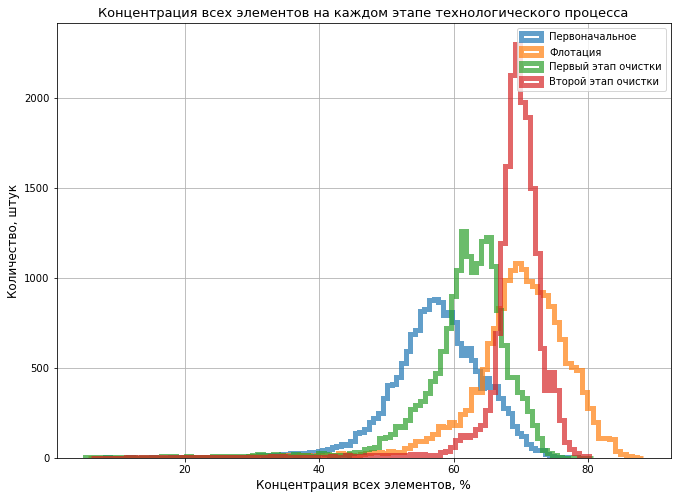

In [42]:
def delete_anomaly(data):
    '''Возвращает DataFrame без аномалий: выводит количество строк и новое распределение данных на графике'''
    print('Количество строк до удаления аномалий:',len(data))
    data = data[data['rougher.input.concentrate_ag_au_pb_sol'] > 5]
    data = data[data['rougher.output.concentrate_ag_au_pb_sol'] > 5]
    data = data[data['primary_cleaner.output.concentrate_ag_au_pb_sol'] > 5]
    data = data[data['final.output.concentrate_ag_au_pb_sol'] > 5]
    
    print('Количество строк после удаления аномалий:',len(data))
    
    plot_hist(data,
          'rougher.input.concentrate_ag_au_pb_sol',
          'rougher.output.concentrate_ag_au_pb_sol',
          'primary_cleaner.output.concentrate_ag_au_pb_sol',
          'final.output.concentrate_ag_au_pb_sol',
          'всех элементов')
    
    return data

df_net = delete_anomaly(df_net)

Аналогично удалим аномалии из таблицs **train**.

Количество строк до удаления аномалий: 14149
Количество строк после удаления аномалий: 13585


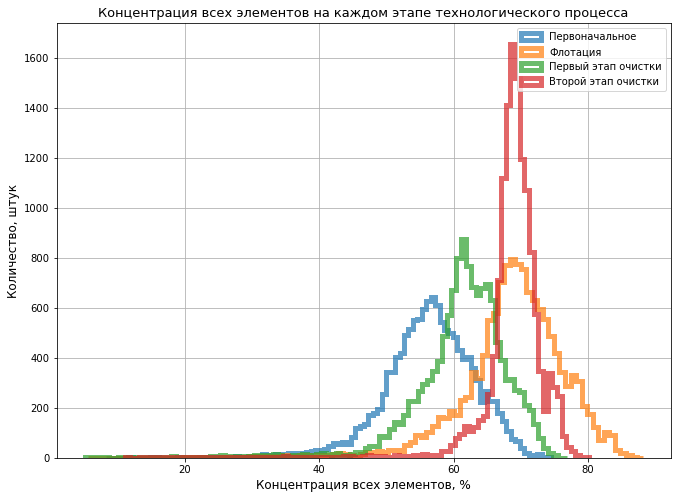

In [43]:
train = delete_anomaly(train)

А также из таблицы **test**.

Количество строк до удаления аномалий: 5840
Количество строк после удаления аномалий: 4822


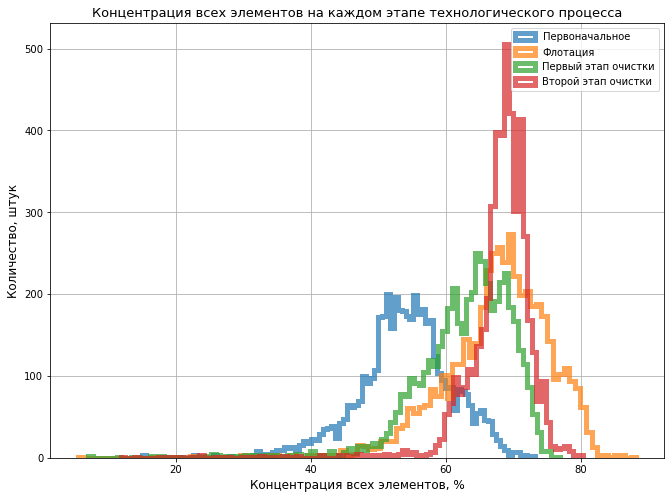

In [44]:
test = delete_anomaly(test)

Аномалии удалены, перейдем к построению моделей.

Промежуточные выводы.

На каждом этапе присутствует нулевая суммарная концентрация всех элементов. Скорее всего это связано с технологическим перерывом в процессе производства. Данные аномалии удалили из данных, в качества порога приняли 5% суммарную концентрацию.


## Построение модели

Выделим признаки и целевой признак для обучающей и тестовой выборок. Все параметры с концентрацией в черновом концентрате, после первого этапа обработки и в финальном концентрате, а также в отвальных хвостах уберем, чтобы не допустить "утечки целевого признака".

Целевыми признаками являются: **final.output.recovery и rougher.output.recovery**. 

Сформируем список признаков.

In [45]:
print('Количество признаков в тестовой выборке:',len(test.columns))

x_col = test.columns.drop(['rougher.output.recovery','final.output.recovery',
                           'rougher.input.concentrate_ag_au_pb_sol','rougher.output.concentrate_ag_au_pb_sol',
                           'primary_cleaner.output.concentrate_ag_au_pb_sol',
                           'final.output.concentrate_ag_au_pb_sol'])

print('Количество признаков в x_col:',len(x_col))

x_col

Количество признаков в тестовой выборке: 58
Количество признаков в x_col: 52


Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

Выделим признаки и целевой признак для обучающей и тестовой выборок. 

In [46]:
#выделение признаков и целевого признака для обучающей и валидационной выборок
train_features = train[x_col]
train_target = train[['rougher.output.recovery','final.output.recovery']]

test_features = test[x_col]
test_target = test[['rougher.output.recovery','final.output.recovery']]

print('Размер train_features:',train_features.shape)
print('Размер train_target:',train_target.shape)
print('Размер test_features:',test_features.shape)
print('Размер test_target:',test_target.shape)


Размер train_features: (13585, 52)
Размер train_target: (13585, 2)
Размер test_features: (4822, 52)
Размер test_target: (4822, 2)


А также маштабируем количественные признаки.

In [47]:
scaler = StandardScaler()
scaler.fit(train_features)
train_features[train_features.columns] = scaler.transform(train_features)
test_features[test_features.columns] = scaler.transform(test_features)

In [48]:
train_features.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.177074,0.374527,-0.128205,0.283235,-0.446248,-0.298979,-0.428096,-0.810385,-0.432902,-0.275917,0.054423,-0.217762,-1.318324,-1.125232,0.474583,-0.204276,0.103210,-0.735593,0.080395,0.119344,0.129217,0.144386,-0.731985,-0.348509,1.534105,0.506741,1.410501,0.401491,1.839664,0.247068,1.697319,0.158918,2.154574,0.217679,-0.664513,0.054689,-0.170808,0.029190,-0.937055,-0.318441,-0.145702,-0.257554,-1.050476,-0.476019,-0.641695,-0.760038,-1.178510,-0.383923,-0.863797,-0.430285,-0.960793,-2.680571
1,-0.214812,0.424608,-0.128205,0.320249,-0.241054,-0.355609,-0.241347,-0.321372,-0.238543,-0.294682,0.126016,-0.337231,-1.285994,-1.142663,0.491638,-0.126984,-0.111749,-0.739608,0.075587,0.117298,0.172421,0.149924,-0.728539,-0.306133,1.521694,0.241246,1.401555,0.264969,1.847278,0.271133,1.669234,0.240201,2.059830,0.249879,-0.659772,0.030313,-0.171498,0.045687,-0.935501,-0.406598,-0.116695,-0.260063,-1.054813,-0.535372,-0.670064,-0.702171,-1.158989,-0.432585,-0.880262,-0.433126,-0.987531,-2.516851
2,-0.261493,0.728759,-0.128205,0.289907,-0.043647,-0.329830,-0.055211,-0.343309,-0.045009,-0.339677,0.215230,-0.356677,-1.309766,-1.240909,0.537946,-0.116979,-0.067290,-0.801339,0.059813,0.293590,0.151863,0.306883,-0.731909,-0.306226,1.513900,0.240286,1.397747,0.262752,1.844031,0.271124,1.668987,0.256699,2.063231,0.242660,-0.638218,0.031313,-0.171978,0.052396,-0.945624,-0.394842,0.257014,-0.270841,-1.050798,-0.476667,-0.677232,-0.698783,-1.153548,-0.431517,-0.875210,-0.431476,-0.982233,-2.561201
3,-0.301471,0.730506,-0.128205,0.304478,-0.055989,-0.356939,-0.053135,-0.315789,-0.057655,-0.335566,0.218463,-0.361564,-1.348703,-1.353377,0.660793,-0.104812,0.114138,-0.930802,-0.030768,0.298926,0.090112,0.300299,-0.731343,-0.307562,1.517871,0.229634,1.399352,0.263539,1.833862,0.267965,1.678423,0.255061,2.062764,0.255683,-0.649062,0.043856,-0.160476,0.054042,-0.936161,-0.405196,0.256360,-0.271853,-1.047001,-0.443920,-0.660756,-0.699814,-1.170824,-0.407248,-0.881551,-0.424790,-0.986273,-2.522501
4,-0.411942,0.906871,-0.128205,0.339432,-0.045330,-0.300778,-0.047204,-0.334896,-0.063029,-0.340201,0.226294,-0.373296,-1

Перейдем к построению моделей.

### Функция для вычисления метрики качества sMAPE

Напишем функцию, которая будет вычислять итоговую метрику качества.

In [49]:
train_target.head()

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


In [50]:
def total_smape(target, prediction):
    '''Возвращает итоговую метрику качества sMAPE'''
    prediction = pd.DataFrame(prediction)
    
    target_rougher = target.iloc[:,0]
    target_final = target.iloc[:,1]
    prediction_rougher = prediction.iloc[:,0]
    prediction_final = prediction.iloc[:,1]
    
    #расчитывает sMAPE в черновом концентрате
    sum_rougher = abs(target_rougher - prediction_rougher)/((abs(target_rougher)+abs(prediction_rougher))/2)
    smape_rougher =  sum_rougher.mean() * 100
    
    #расчитывает sMAPE в финальном концентрате
    sum_final = abs(target_final - prediction_final)/((abs(target_final)+abs(prediction_final))/2)
    smape_final = sum_final.mean() * 100
    
    #расчитывает итоговую оценку sMAPE
    total_smape = 0.25 * smape_rougher + 0.75 * smape_final
    
    return total_smape

Так как мы будем оценивать модели с помощью метрики sMAPE с помощью кросс-валидации, то сформируем оценку с помощью функции `make_scorer`, которую будем передавать в кросс-валидацию.

In [51]:
smape_scorer = make_scorer(total_smape, greater_is_better=False)

### Создание моделей

Создадим три модели: 
- модель линейной регрессии
- решаюшее дерево для регрессии
- случайный лес для регрессии

Для проверки качества будем использовать кросс-валидацию с разбивкой на 5 выборок. 

Создадим модель **Линейной регрессии**. 

In [52]:
%%time
model_line = LinearRegression()
shuffle = KFold(n_splits=5, random_state=13, shuffle=True)
line_score = abs(cross_val_score(model_line, train_features, train_target, cv=shuffle, scoring=smape_scorer))
print('sMAPE:',line_score.mean())


sMAPE: 11.725606815484714
CPU times: user 196 ms, sys: 262 ms, total: 458 ms
Wall time: 88 ms


Для модели линейной регрессии получили **sMAPE равной 12,96**. 

Добавим полученный результат в сводную таблицу.

In [53]:
result = pd.DataFrame({"Model": ["Linear Regression"], 
                       "sMAPE train": [line_score.mean()], 
                       "Time train/RandomizedSearchCV": ["82 ms"]
                      })

result

,Model,sMAPE train,Time train/RandomizedSearchCV
0,Linear Regression,11.725607,82 ms


Создадим модель **Дерева решений** и подберем параметры с помощью `RandomizedSearchCV`, для этого напищем функцию. Функция `RandomizedSearchCV` ужк использует кросс-валидацию, дополнительно ее использовать не будем.

In [54]:
model_tree = DecisionTreeRegressor(random_state=1)

#формирует гиперпараметры и их значения для перебора в функции RandomizedSearchCV
param_grid_tree = {
    'max_depth':[x for x in range(1, 30, 1)], 
    'min_samples_leaf':[x for x in range(2, 20, 1)],
    'min_samples_split':[x for x in range(2, 20, 1)],
}

In [55]:
def grid_param(model,param_grid,features,target):
    """
    Возвращает гиперпараметры, заданные в параметре param_grid, при которых model получает 
    лучшее значение sMAPE.
    """
    grid = RandomizedSearchCV(model, param_grid, n_iter=10, cv=shuffle, random_state=13, scoring=smape_scorer)

    model = grid.fit(features, target)
    best_score = abs(model.best_score_)

    print('Лучшее значение sMAPE: {:.3f} '.format(best_score))
    print('Значения гиперпараметров:')
    print(model.best_params_)
    return model, best_score

In [56]:
%%time
model_tree_best, tree_score = grid_param(model_tree,param_grid_tree,train_features, train_target)

Лучшее значение sMAPE: 10.270 
Значения гиперпараметров:
{'min_samples_split': 4, 'min_samples_leaf': 6, 'max_depth': 1}
CPU times: user 14.8 s, sys: 719 ms, total: 15.6 s
Wall time: 14.8 s


Лучшее значение sMAPE для "Решающего дерева" получили при следующих гиперпараметрах:
- максимальная глубина дерева равна 1,
- минимальное число объектов в узле дерева - 4,
- минимальное число объектов в листьях дерева - 6. 

Проверим какие параметры содержит полученная модель.

In [57]:
pprint(model_tree_best.best_estimator_.get_params())


{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}


Модель содержит нужные параметры. Добавим полученный результат в сводную таблицу.

In [58]:
result = result.append({"Model": "Decision Tree Regressor", 
                       "sMAPE train": tree_score, 
                       "Time train/RandomizedSearchCV": "52.2 s"},
                      ignore_index=True)

result

,Model,sMAPE train,Time train/RandomizedSearchCV
0,Linear Regression,11.725607,82 ms
1,Decision Tree Regressor,10.270251,52.2 s


Создадим модель **Случайного леса** и подберем параметры.

In [59]:
model_forest = RandomForestRegressor(random_state=13) 

#формирует гиперпараметры и их значения для перебора в функции RandomizedSearchCV
param_grid_forest = { 
    'n_estimators': [x for x in range(10, 100, 10)],
    'max_depth' : [x for x in range(2, 20, 1)],
    'min_samples_leaf':[x for x in range(2, 10, 1)],
    'min_samples_split':[x for x in range(2, 10, 1)]
    
}

In [60]:
%%time
model_forest_best, forest_score = grid_param(model_forest,param_grid_forest,train_features, train_target)

Лучшее значение sMAPE: 10.656 
Значения гиперпараметров:
{'n_estimators': 10, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 2}
CPU times: user 7min 8s, sys: 1.72 s, total: 7min 10s
Wall time: 7min 12s


Лучшее значение sMAPE для "Случайного леса" получили при следующих гиперпараметрах:
- количество деревьев в лесу - 10,
- максимальная глубина дерева равна 2,
- минимальное число объектов в узле дерева - 3,
- минимальное число объектов в листьях дерева - 4. 

Проверим какие параметры содержит полученная модель.

In [61]:
pprint(model_forest_best.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 13,
 'verbose': 0,
 'warm_start': False}


Модель содержит нужные параметры. Добавим полученный результат в сводную таблицу.

In [62]:
result = result.append({"Model": "Random Forest Regressor", 
                       "sMAPE train": forest_score, 
                       "Time train/RandomizedSearchCV": "7min 41ss"},
                      ignore_index=True)

result

,Model,sMAPE train,Time train/RandomizedSearchCV
0,Linear Regression,11.725607,82 ms
1,Decision Tree Regressor,10.270251,52.2 s
2,Random Forest Regressor,10.655667,7min 41ss


Полученные результаты от трех моделей очень близки, единственный минус модели случайного леса - самое долгое время обучения с подбором параметров - 7min 41s.
Проверим все три модели на тестовой выборке.  

In [63]:
#модель Линейной регрессии
model_line.fit(train_features, train_target)
prediction_line = pd.DataFrame(model_line.predict(test_features))
line_score_test = total_smape(test_target, prediction_line)
print('sMAPE линейной регрессии: {:.3f}'.format(line_score_test))


#Решающее дерево для регрессии
prediction_tree = pd.DataFrame(model_tree_best.predict(test_features))
tree_score_test = total_smape(test_target, prediction_tree)
print('sMAPE решающего дерева: {:.3f}'.format(tree_score_test))


#Случайный лес для регрессии
prediction_forest = pd.DataFrame(model_forest_best.predict(test_features))
forest_score_test = total_smape(test_target, prediction_forest)
print('sMAPE случайного леса: {:.3f}'.format(forest_score_test))


sMAPE линейной регрессии: 14.095
sMAPE решающего дерева: 10.641
sMAPE случайного леса: 10.554


Добавим полученные значения в итоговую таблицу.

In [64]:
result['sMAPE test'] = [line_score_test,tree_score_test,forest_score_test]
result

,Model,sMAPE train,Time train/RandomizedSearchCV,sMAPE test
0,Linear Regression,11.725607,82 ms,14.094886
1,Decision Tree Regressor,10.270251,52.2 s,10.641365
2,Random Forest Regressor,10.655667,7min 41ss,10.554478


На тестовой выборки модель линейной регрессии показала наихудший результат - 14.095. Модели решаюшего дерева и случайного леса снова показали близкие значения sMAPE: 10.641 и 10.554 соответственно.

Промежуточные результаты.

- Созданы три модели: 
    - Линейная регрессия
    - Решающее дерево
    - Случайный лес
    
    
- Все три модели показали близкий результат на обучающей выборке. Модель случайного дерева уступает только во времени обучения при подборе параметров.
    - Линейная регрессия - **sMAPE 11.726**
    - Решающее дерево - **sMAPE 10.270**
    - Случайный лес - **sMAPE 10.656**
    
    
- На тестовой выборке худший результат у модели линейной регрессии, а модели решающего дерева и случайного леса показали снова близкий результат:
    - Линейная регрессия - **sMAPE 14.095**
    - Решающее дерево - **sMAPE 10.641**
    - Случайный лес - **sMAPE 10.554**



### Проверка модели на адекватность

Сравним полученные модели с медианной моделью.

In [65]:
%%time
pred_median = train_target.copy()
pred_median.iloc[:,0] = train_target.iloc[:,0].median()
pred_median.iloc[:,1] = train_target.iloc[:,1].median()
print('sMAPE на обучающей выборке: {:.3f}'.format(total_smape(train_target, pred_median)))


pred_median_test = test_target.copy()
pred_median_test.iloc[:,0] = train_target.iloc[:,0].median()
pred_median_test.iloc[:,1] = train_target.iloc[:,1].median()
print('sMAPE на тестовой выборке: {:.3f}'.format(total_smape(test_target, pred_median_test)))

sMAPE на обучающей выборке: 9.337
sMAPE на тестовой выборке: 10.135
CPU times: user 8.69 ms, sys: 29.1 ms, total: 37.8 ms
Wall time: 8.33 ms


In [66]:
result

,Model,sMAPE train,Time train/RandomizedSearchCV,sMAPE test
0,Linear Regression,11.725607,82 ms,14.094886
1,Decision Tree Regressor,10.270251,52.2 s,10.641365
2,Random Forest Regressor,10.655667,7min 41ss,10.554478


На обучающих данных медианна модель показала наилучший результат - sMAPE 9.337, а на тестовых данных - sMAPE 10.135, что близко к нашим моделям, но все же чуть-чуть лучше.
Можем сделать вывод, что все три модели уступают медианной.

## Вывод

**Что сделали:**

- Проверили расчет показателей эффективности обогащения руды, все данные корректны.


- Заменили пропуски на соседние значения, так как в технологическом процессе соседние по времени параметры часто похоже. Это позволило сохранить все данные и не исказить их.


- Провели анализ концентрации металов на каждом этапе технологического процесса.


- Проанализировали размер гранул сырья в обучающей и тестовой выборках.


- Выявили и удалили аномальные значения, связанные, скорее всего, с перерывом в технологическом процессе. В качества порогового значения приняли 5% суммарную концентрацию.


- Маштабировали количественные признаки с помощью метода стандартизаци данных.


- Проверили работу трех моделей: **"Линейная регрессия", "Дерево решений" и "Случайный лес".


- Проверили модели на адекватность, сравнив результаты с результатами медианной модели.

**Вывод:**


1. В процессе технологического производства наблюдается рост доли золота и свинца. Наибольший рост достигает концентрация золота - в среднем с 8 до 45%. Концентрация свинца в среднем растет с 3% до 10%.  Несмотря на то, что доля серебра увеличивается после этапа флотации, после двухэтапной очистки ее концентрация снижается ниже первоначальной. Итоговое снижение доли серебра в среднем составляет с 8 до 5%. 

2. **В исходном сырье** средний размер гранул и их медианы незначительно различается в обучающей и тестовой выборках:
    - средний размер гранул в обучающей выборки - 60 у.е., в тестовой - 56 у.е.
    - медиана в обучающей выборки - 55 у.е., в тестовой - 50 у.е

3. **В черновом концентрате** средний размер гранул и их медианы почти аналогичны, разброс значений размера гранул в черновом концентрате стал гораздо уже (0-15.5 у.е.), чем в исходном сырье (0-484 у.е.):
    - средний размер гранул в обучающей выборки - 7.32 у.е., в тестовой - 7.26 у.е.
    - медиана в обучающей выборки - 7.29 у.е., в тестовой - 7.25 у.е


4. Все три модели показали близкий результат на обучающей выборке. Модель случайного дерева уступает только во времени обучения при подборе параметров:
    - Линейная регрессия - **sMAPE 11.726**
    - Решающее дерево - **sMAPE 10.270**
    - Случайный лес - **sMAPE 10.656**
    
    
5. На тестовой выборке худший результат у модели линейной регрессии, а модели решающего дерева и случайного леса показали снова близкий результат:
    - Линейная регрессия - **sMAPE 14.095**
    - Решающее дерево - **sMAPE 10.641**
    - Случайный лес - **sMAPE 10.554**


6. Медианная модель на тестовой выборке достигла лучшего значения sMAPE - 9.337, а на тестовых данных показала sMAPE, близкий к нашим моделям, но все же чуть-чуть лучше - 10.135. 


**Рекомендации:**
Исходя из метрики качества и скорости работы, все три модели уступают медианной модели для предсказания эффективности обогащения руды. Рекомендуем провести более глубокий анализ для разработки требуемой модели, а пока использовать медианную модель.